# 训练集、验证集、测试集概念

## 基本概念

机器学习中，原始数据依据训练的需求划分为训练集、验证集、测试集三部分，其中训练集用于模型训练与知识**学习**，验证集、测试集用于**评估**模型效果

- **训练集：** 用于训练模型的数据集

- **验证集：** 训练过程中评估模型效果的数据集

- **测试集：** 用于最终评估模型效果的数据集

通俗理解：

- **训练集就是平时作业，** 用于帮助我们学习知识、提高成绩，是知识的来源

- **验证集是各种期中考试、期末考试，** 用于帮助我们在平时过程中评估自己的成绩与能力，校正学习的方向，反思自己的不足

- **测试集是高考，** 反应最终的学习效果，且只有一次机会

## 数据集划分示意图

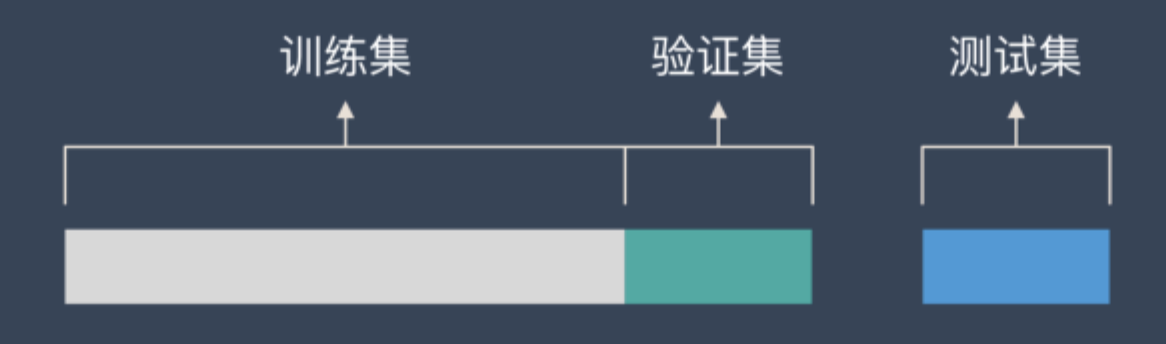

In [11]:
# 训练集、验证集、测试集概念展示
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C03 机器学习——训练集、验证集、测试集划分-train_test_split().png', width=600, height=400)

## 训练集、验证集、测试集划分原则

- **测试集对齐线上业务场景：** 实际业务中，测试集的划分与处理需要与线上真实业务场景分布一致，保证线下测试集效果与线上业务场景指标**同增减**，做到线下测试集完全反映线上业务指标情况

- **训练集、验证集对齐测试集：** 尽量保证训练集、验证集数据分布与测试集一致

- **绝对绝对绝对要避免数据泄漏：** 在划分数据集时，确保不会将任何测试集的信息泄露到训练过程中，这包括特征工程、模型训练和超参数调整，否则会导致模型作弊，模型的准确率下降。

    - **特征工程：** 特征工程中禁止将测试集部分特征信息合并到训练集中，这会导致测试集中的部分信息泄漏到训练集中。
    - **模型训练：** 禁止测试集数据加入模型训练
    - **超参数调整：** 禁止使用测试集数据进行调参

- **合理分配比例：** 根据项目的具体需求和数据量，合理分配训练集、验证集和测试集的比例。一般来说，训练集、验证集、测试集的分配比例为0.8:0.1:0.1

# 代码实现

## train_test_split
- `arrays`: 待划分数据集
- `test_size`: 验证集数据占比
- `random_state`: 随机数种子，保证结果可以复现

## 实际案例

Iris鸢尾花数据集是一个经典的机器学习数据集，包含了三种鸢尾花（Setosa, Versicolor, Virginica）的不同特征，每个花种有 50 个样本，总共有 150 个样本
- sepal_length：花萼长度
- sepal_width：花萼宽度
- petal_length：花瓣长度
- petal_width：花瓣宽度
- species：花种

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 加载 iris 数据集
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
# 使用 train_test_split 将数据集划分为训练集和验证集
# 验证集占总数据的10%，random_state用于确保每次划分结果都是一样的
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
# 创建随机森林分类器实例
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 在训练集上训练模型
rf_classifier.fit(X_train, y_train)

# 在验证集上进行预测
y_pred = rf_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00
